# Feature extraction from the DeepLabV3+ neural network

### Import nececary dependencies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

import tensorflow as tf
from model import Deeplabv3

### Instantiate model using weights pretrained on mobilenet dataset and input image size 512x512. Then compile the network.

In [2]:
model = Deeplabv3(weights="pascal_voc", input_shape=(512, 512, 3), backbone="xception", classes=21, activation='softmax')
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### We need to resize the image to 512x512.

In [3]:
def preprocess_image(image):
    from skimage.transform import resize

    image = resize(image, (512, 512), anti_aliasing=True)
    image = np.expand_dims(image, axis=0)
    return image

### Input some example images.

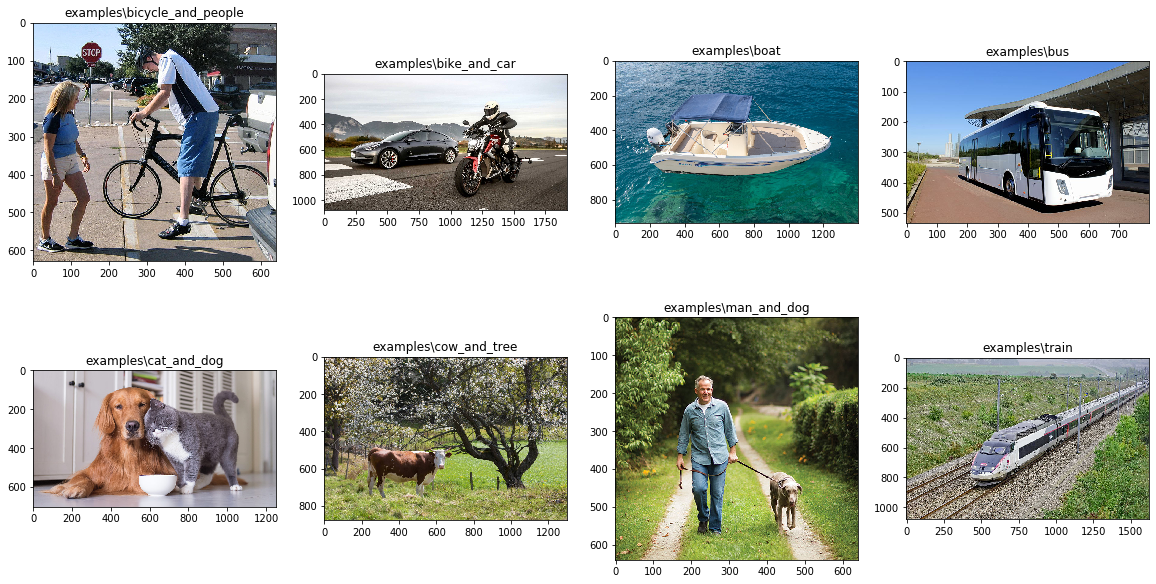

In [4]:
import glob

i = 0
image_list = []
name_list = []

for filename in glob.glob('examples/*.jpg'):
    img = plt.imread(filename)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(filename.split('.jpg')[0])
    
    img = preprocess_image(img)
    image_list.append(img)
    name_list.append(filename.split('.jpg')[0])
    i += 1
plt.show()

## Create a model that returns as output the features from all the network layers.

In [5]:
outputs = [layer.output for layer in model.layers]
model = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)

### Let's visualize some of the features for clarity puposes.

In [6]:
def show_features(feature_map, title):
    columns = rows = 8
    if feature_map.shape[3] < 64: rows = 4
    
    fig = plt.figure()
    fig.suptitle(title, fontsize = 20)
    
    i = 0
    for _ in range(columns):
        for _ in range(rows):
            ax = fig.add_subplot(columns , rows, i+1)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_map[0, :, :, i], cmap='gray')
            i += 1
    plt.show()

### Create a feature map out of a selected layer of the network.

In [7]:
selected_layer = 405

feature_list = []
for img in image_list:
    feature_map = model.predict(img)[selected_layer]
    feature_list.append(feature_map)

### Visualize some of the features for the example images.

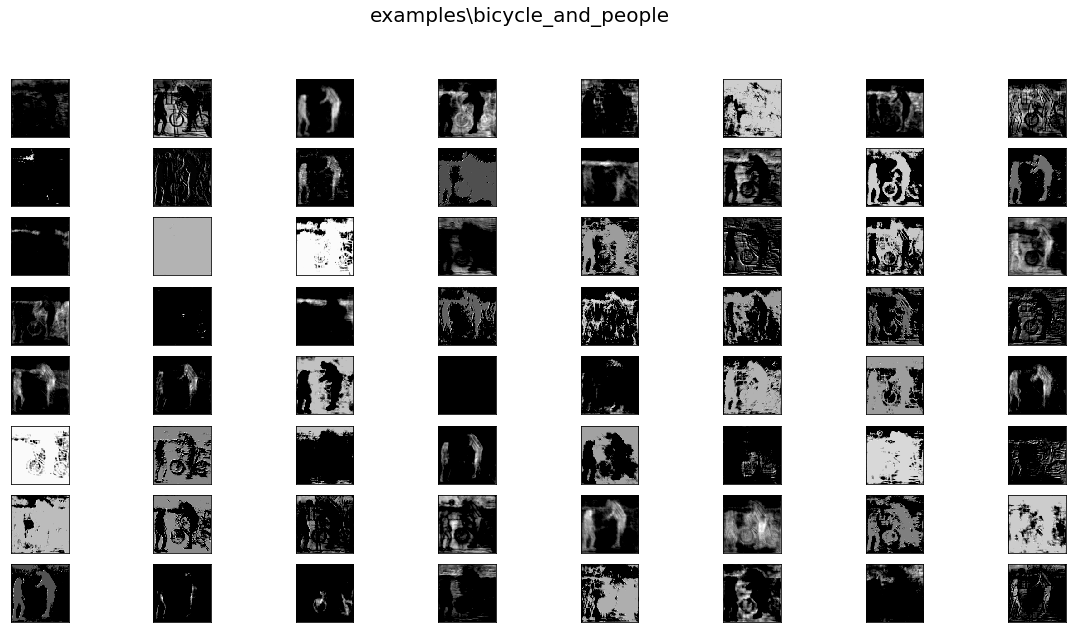

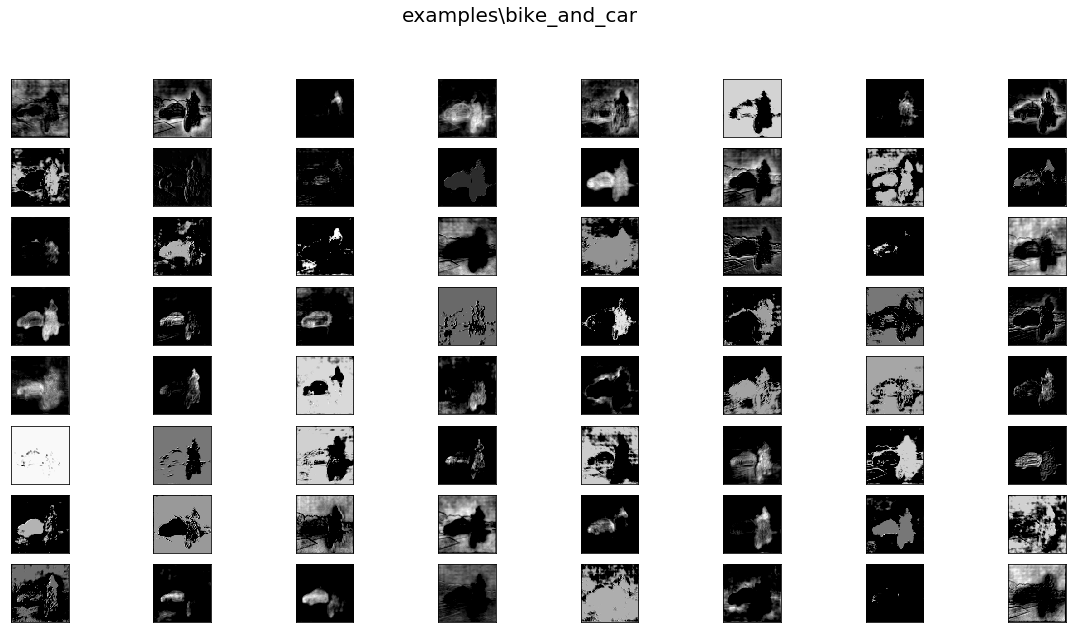

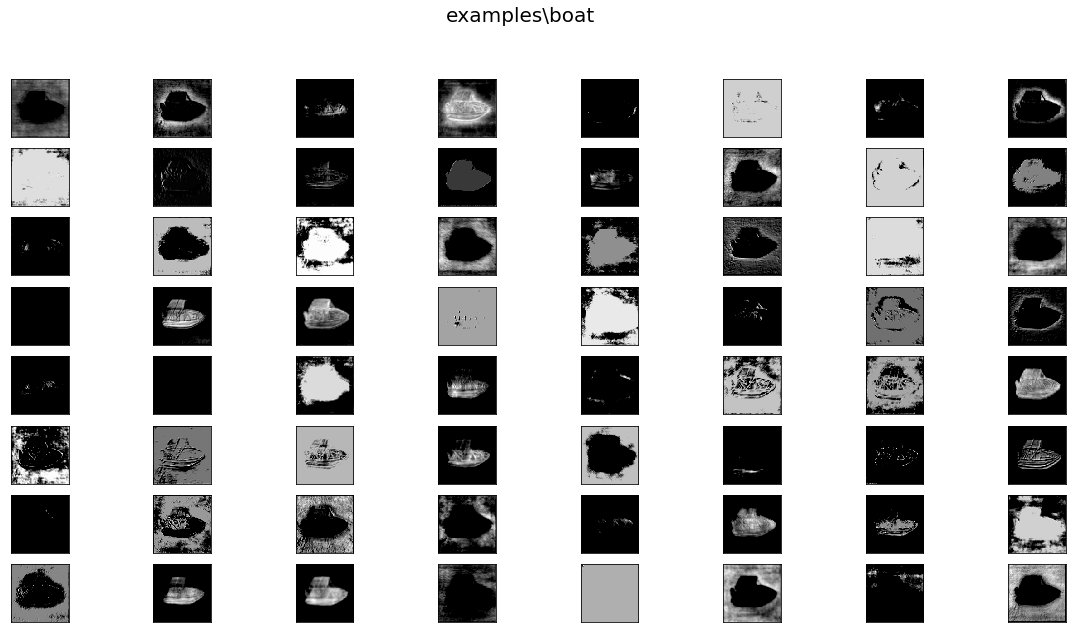

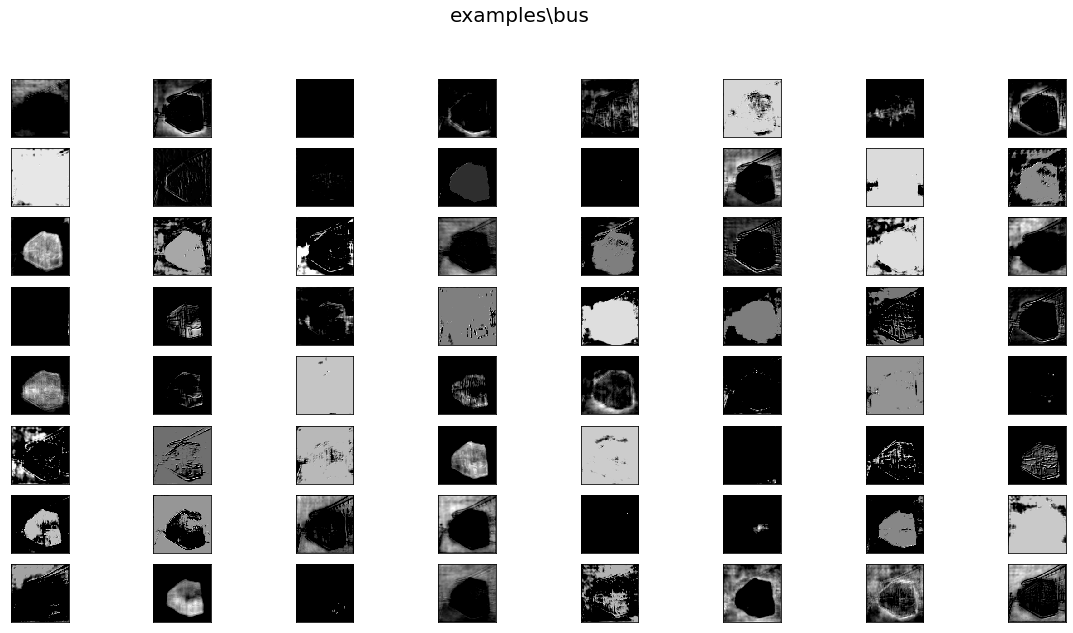

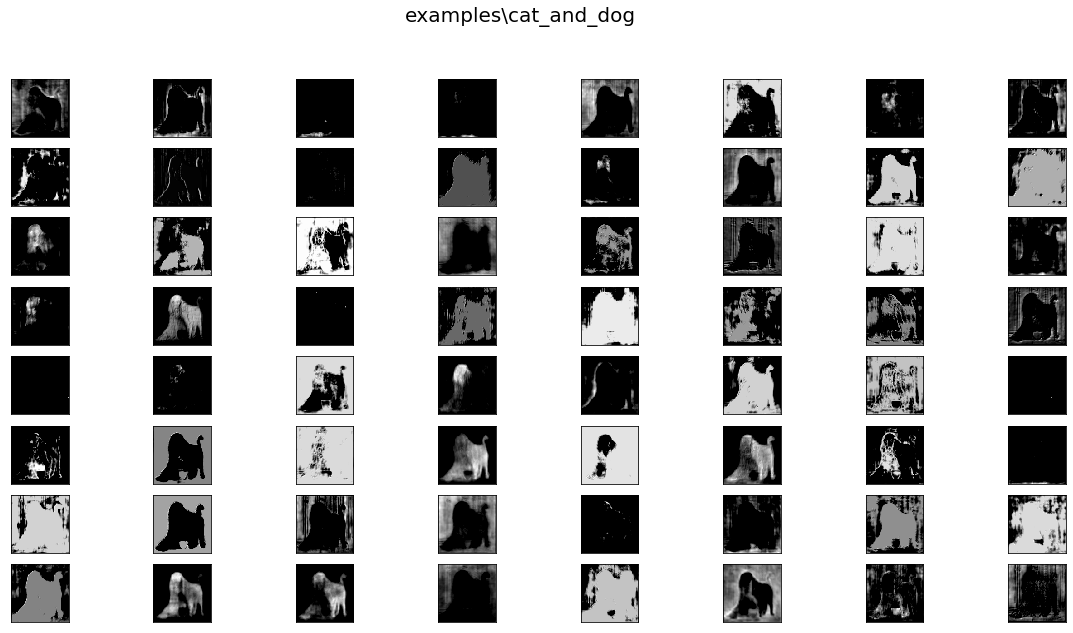

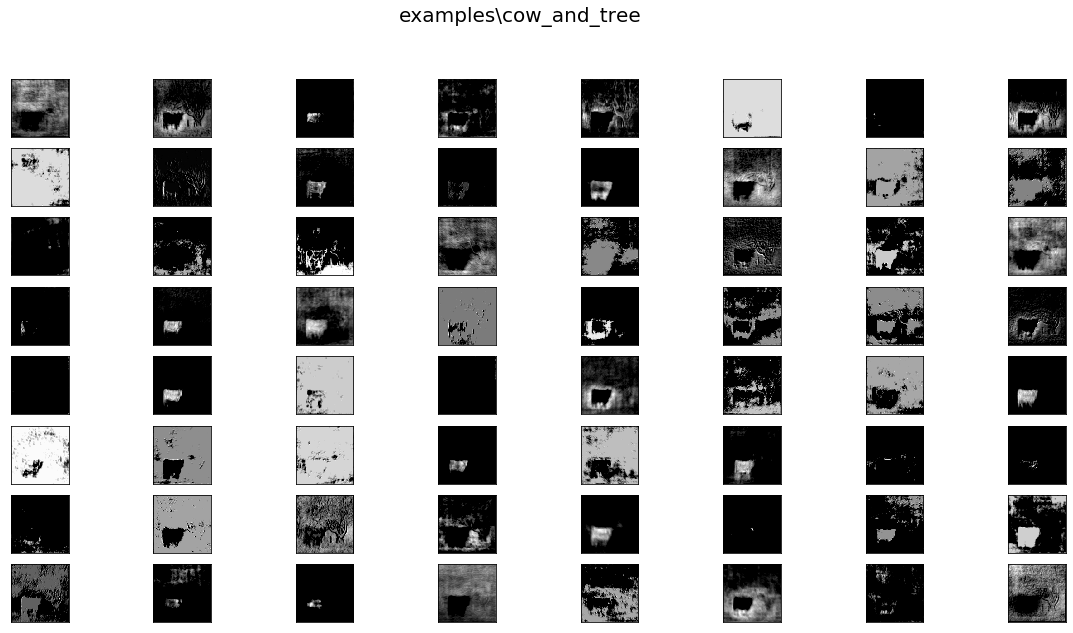

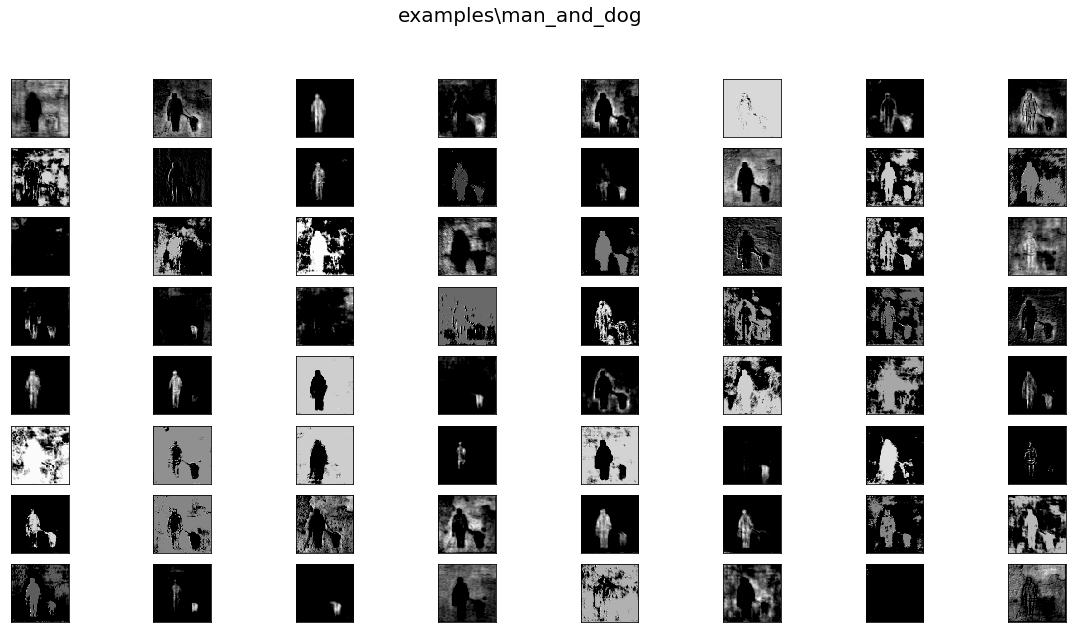

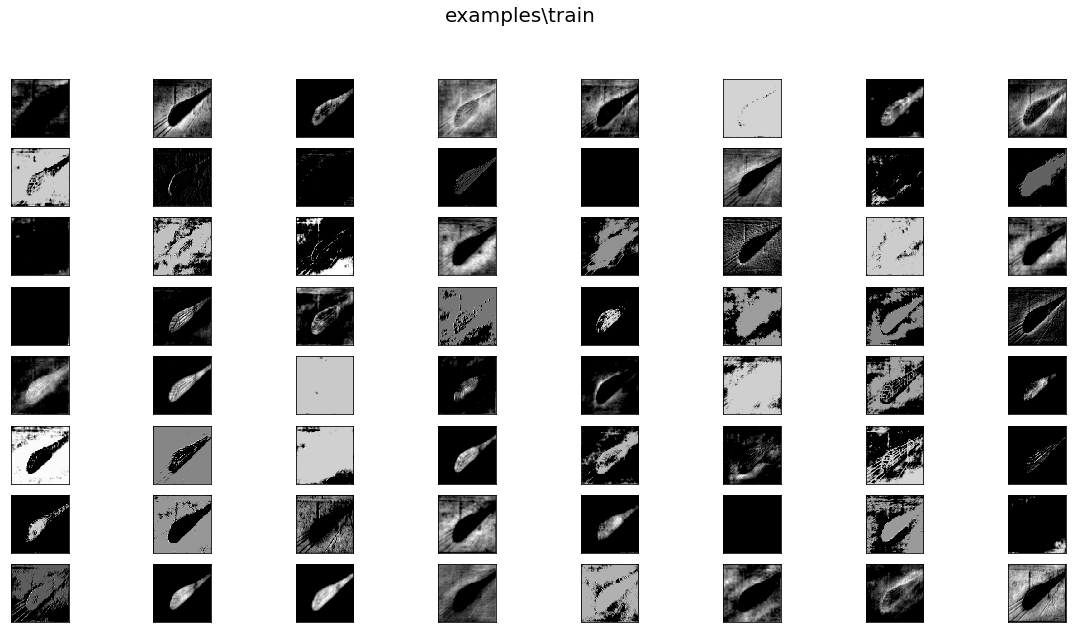

In [8]:
for i in range(len(image_list)):
    show_features(feature_list[i], name_list[i])

### In order to get a rough estimate of what kind of information we get from the features, we need to use dimentionality reduction on the feature map of the selected layer. Let's use the Principal Component Analysis (PCA).

In [9]:
def reduce_dimention(feature_map, components):
    from sklearn.decomposition import PCA
    
    h, w, d = tuple(np.shape(feature_map)[1:])
    feature_map_reshaped = np.reshape(feature_map, (h*w, d))
    
    pca = PCA(n_components = components)
    pca.fit(feature_map_reshaped)
    reduced = pca.transform(feature_map_reshaped)

    return np.reshape(reduced, (h, w, components))

### Plot the result for n = 3 components.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


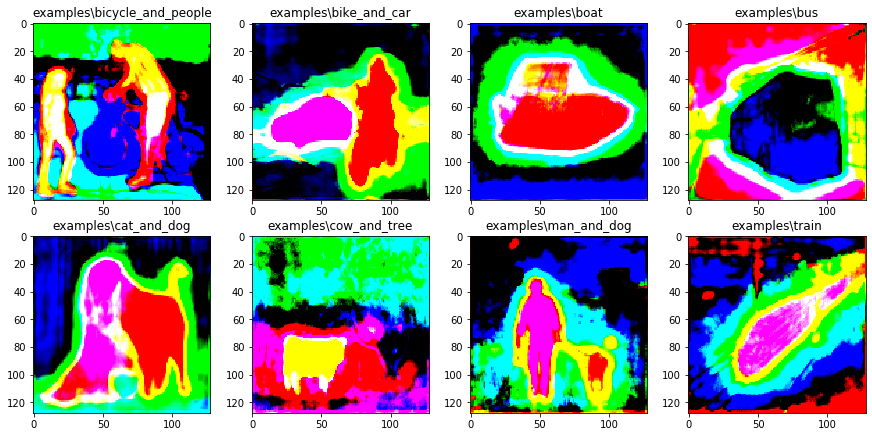

In [10]:
plt.rcParams['figure.figsize'] = [15, 15]

for i in range(len(feature_list)):
    reduced = reduce_dimention(feature_list[i], 3)
    plt.subplot(4, 4, i+1)
    plt.title(name_list[i])
    plt.imshow(reduced)
plt.show()

### Do the same for layers 1, 5, 10, 20, 50, 100, 120, 146.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


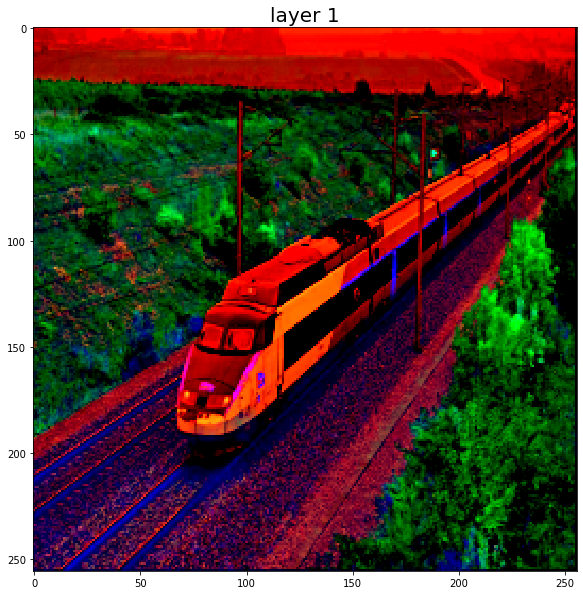

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


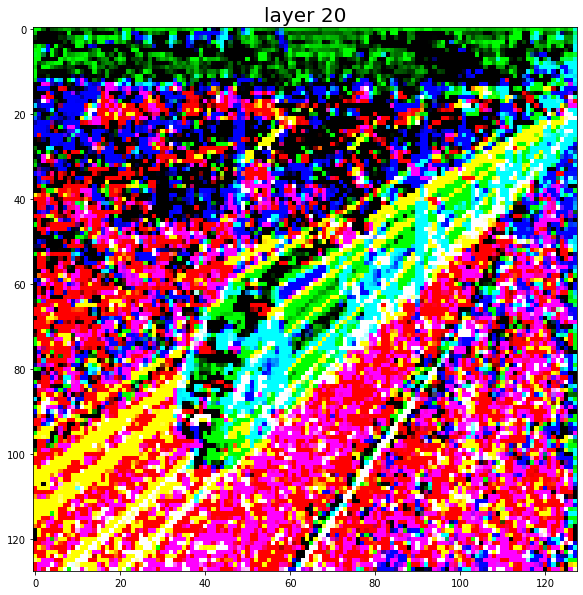

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


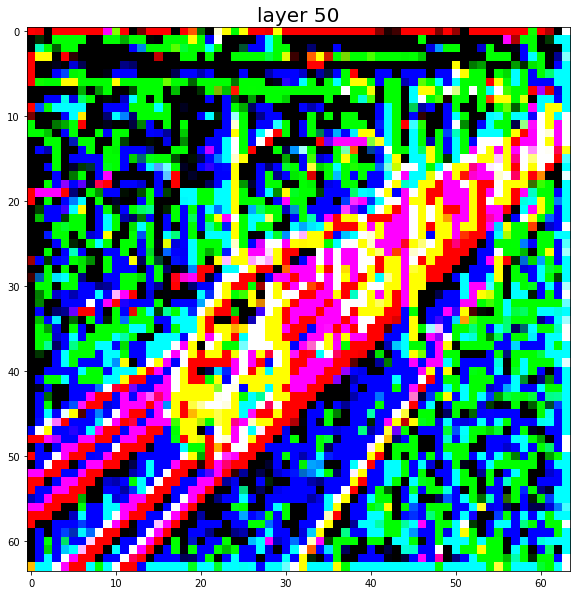

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


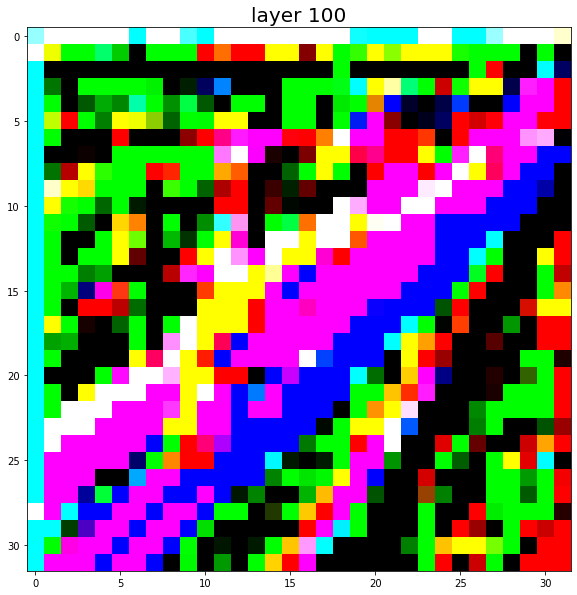

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


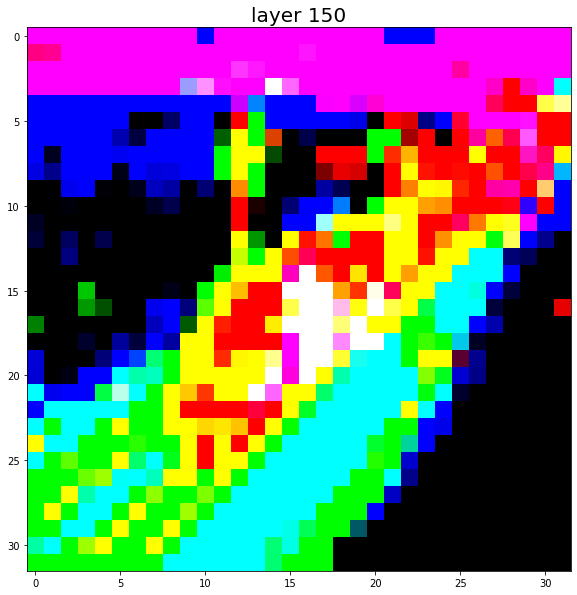

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


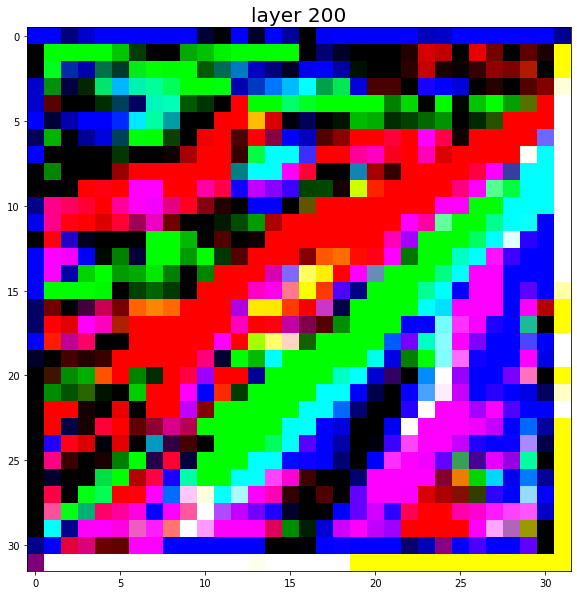

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


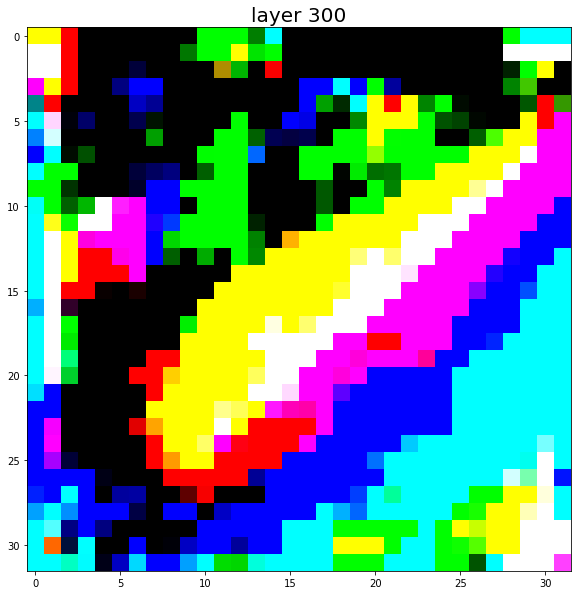

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


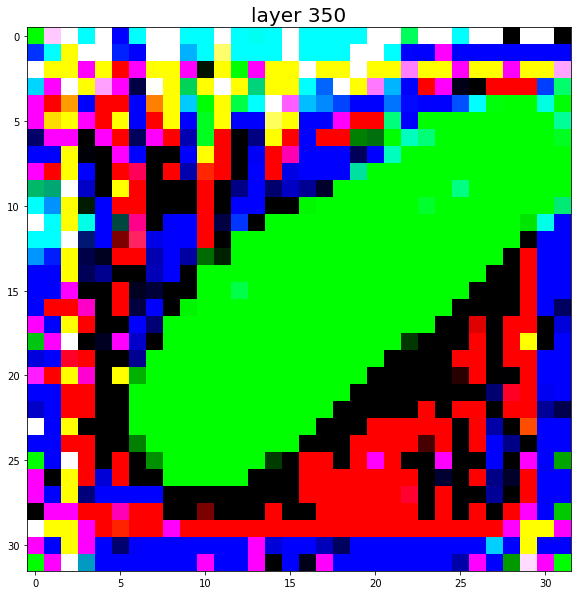

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


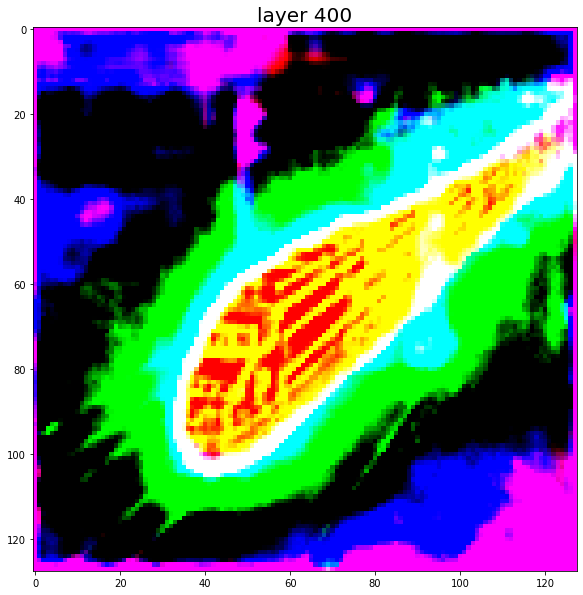

In [11]:
selected_layers = [1, 20, 50, 100, 150, 200, 300, 350, 400]

plt.rcParams['figure.figsize'] = [10, 10]
for l in selected_layers:
    feature_map = model.predict(image_list[7])[l]
    reduced = reduce_dimention(feature_map, 3)
    
    plt.title('layer {}'.format(l), fontsize = 20)
    plt.imshow(reduced)
    plt.show()

### Find all the activation layers for the puposes of visualization.

In [12]:
activation_layers = []
for i in range(len(model.layers)):
    layer = model.layers[i]
    if layer.name.split('_')[0] == 'activation':
        activation_layers.append(i)

print(activation_layers)

[3, 6, 7, 12, 18, 27, 32, 38, 47, 52, 58, 67, 72, 77, 83, 88, 93, 99, 104, 109, 115, 120, 125, 131, 136, 141, 147, 152, 157, 163, 168, 173, 179, 184, 189, 195, 200, 205, 211, 216, 221, 227, 232, 237, 243, 248, 253, 259, 264, 269, 275, 280, 285, 291, 296, 301, 307, 312, 317, 323, 328, 333, 343, 346, 349, 352, 355, 358, 369, 370, 371, 377, 384, 385, 386, 390, 395, 399, 402, 405, 408, 411]


### Visualize the layer before and after each activation layer of a small sample.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


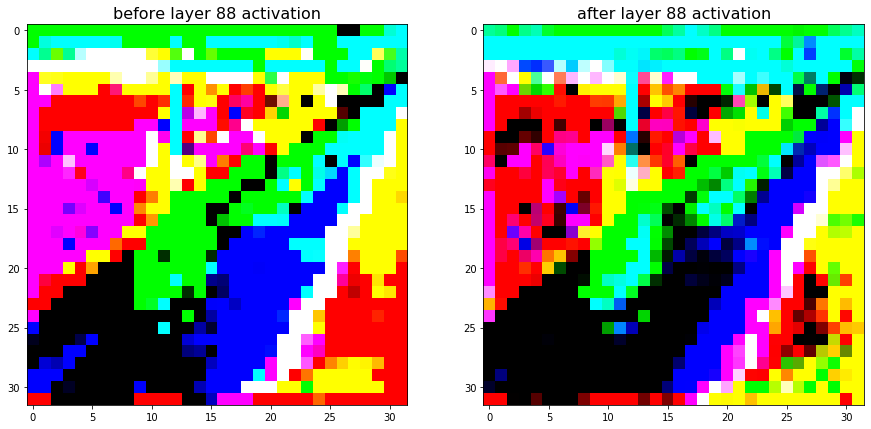

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


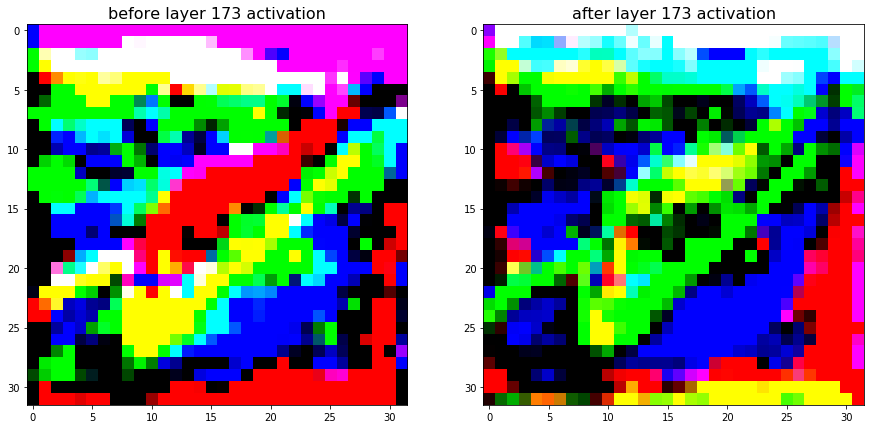

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


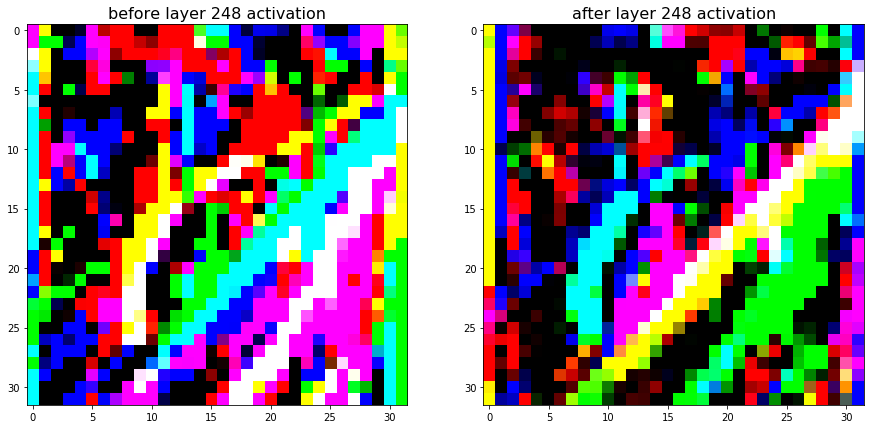

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


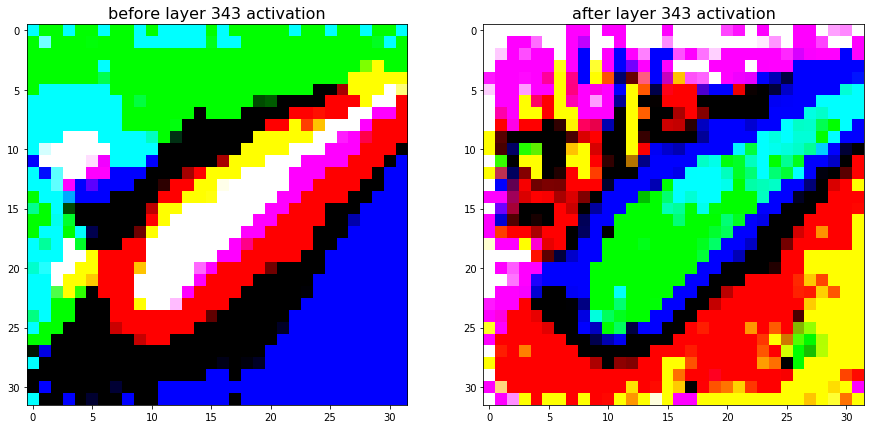

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


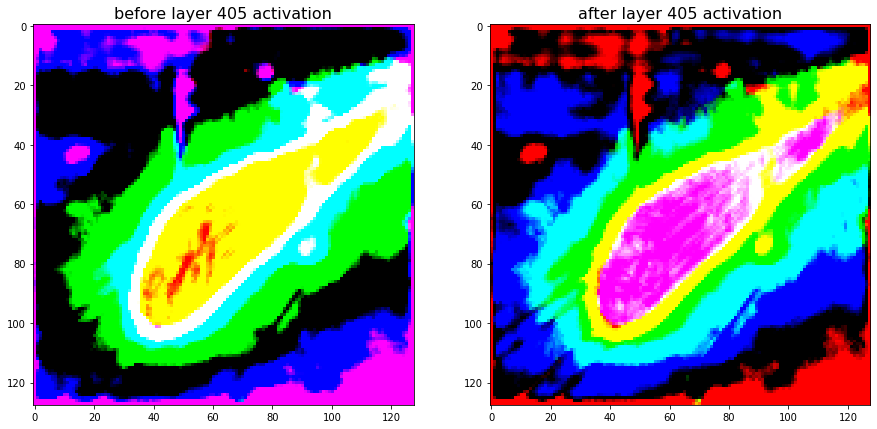

In [13]:
activations_sample = [88, 173, 248, 343, 405]
image = image_list[7]

plt.rcParams['figure.figsize'] = [15, 15]
for i in activations_sample:
    before = model.predict(image)[i-1]
    plt.subplot(1, 2, 1)
    plt.title('before layer {} activation'.format(i), fontsize = 16)
    plt.imshow(reduce_dimention(before, 3))
    
    after = model.predict(image)[i]
    plt.subplot(1, 2, 2)
    plt.title('after layer {} activation'.format(i), fontsize = 16)
    plt.imshow(reduce_dimention(after, 3))
    plt.show()

### To extract features from multiple layers we need to do zero padding on the features with missmatching dimention.

In [14]:
def pad(features, new_shape):
    if features.shape[1] == new_shape[1] and features.shape[2] == new_shape[2]:
        return features
    
    padded = np.zeros(new_shape)
    padded[:, :features.shape[1], :features.shape[2],:] = features
    return padded

### Let's try a feature mix from two activation layers. Zero pad the features into the shape of the last layer, in this case (128, 128) and concatenate them into a single numpy array.

In [15]:
selected_layers = [390, 395, 399, 405]

feature_list = []
for img in image_list:
    feature_map = model.predict(img)[selected_layers[-1]]
    feature_list.append(feature_map)

feature_mix = np.array(feature_list).squeeze(axis=1)

for layer in selected_layers[0:]:
    feature_list = []
    for img in image_list:
        feature_map = model.predict(img)[layer]
        feature_list.append(feature_map)
    
    feature_array = np.array(feature_list).squeeze(axis=1)
    shape = feature_array.shape
    
    new_shape = (shape[0], 128, 128, shape[3])
    padded_feature_array = pad(feature_array, new_shape)
    
    feature_mix = np.concatenate((feature_mix, padded_feature_array), axis=3)

print('Feature mix shape: ', feature_mix.shape)

Feature mix shape:  (8, 128, 128, 1120)


### Finally save the results in a .npy file.

In [16]:
np.save('feature_mix', feature_mix)